# Reading Agilent GCMS Files with `chemtbd`

> __NOTE__: We need a name.  See [issue 3](https://github.com/blakeboswell/chemtbd/issues/3).

Currently there is a hiearchy of objects for reading GCMS data:

- `GcmsDir` object will read `RESULTS.csv` and `DATA.MS` from a single Agilent `.D` directory
- `GcmsData` object will read a `DATA.MS` file
- `GcmsResults` object will read a `RESULTS.csv` file

These objects are available for import and direct use.  However, the main interface for file reading is the `chemtbd.io.Agilent` object which is a wrapper for the above methods.

To use `chemtbd.io.Agilent`, import it as follows.  The directory that contains the `chemtbd` folder has to be the working directory

In [1]:
from chemtbd.io import Agilent

`Agilent` provides three main read functions:

- `from_dir` expects a path to single Agilent `.D` directory as input
- `from_root` expects a path to a parent directory containing only `.D` directories as children
- `from_list` expects a list of paths to Agilent `.D` directories

For example, let's load all `.D` folders from the directory `data/test3`:

In [2]:
agi = Agilent.from_root('data/test3')

Let's look at what `.D` folders loaded from the above directory:

In [3]:
agi.keys()

dict_keys(['FA01.D', 'FA02.D', 'FA03.D', 'FA04.D', 'FA05.D', 'FA06.D', 'FA07.D', 'FA08.D', 'FA09.D', 'FA10.D', 'FA11.D', 'FA12.D', 'FA13.D', 'FA14.D', 'FA15.D'])

# Accessing all Files

We can access the __RESULTS.CSV__ `lib`, `fid`, and `tic` tables from all Agilent directories as a single pandas DataFrame using the below commands.

In [17]:
agi.results_lib.head()

,header=,pk,rt,pct_area,library_id,ref,cas,qual
key,,,,,,,,
FA03.D,1=,1.0,5.7877,2.0335,Methyl octanoate,17.0,000000-00-0,96.0
FA03.D,2=,2.0,7.3441,3.4015,Methyl decanoate,1.0,000000-00-0,98.0
FA03.D,3=,3.0,8.0364,1.7448,Methyl undecanoate,2.0,000000-00-0,98.0
FA03.D,4=,4.0,8.6715,3.9674,Methyl dodecanoate,3.0,000000-00-0,98.0
FA03.D,5=,5.0,9.2781,1.9607,Methyl tridecanoate,4.0,000000-00-0,99.0


In [18]:
agi.results_fid.head()

,header=,peak,rt,first,end,pk_ty,height,area,pct_max,pct_total
key,,,,,,,,,,
FA03.D,1=,1,6.250716,5.938180,6.563252,M,2578080,14894660,1,1.962
FA03.D,2=,2,7.858187,7.465278,8.251096,M,9647430,24914490,1,3.282
FA03.D,3=,3,8.357856,7.939963,8.775749,M,6084180,12779820,1,1.683
FA03.D,4=,4,9.798795,9.308855,10.288735,M,19290490,29059610,1,3.828
FA03.D,5=,5,10.669815,10.136324,11.203306,M,8825210,14361540,1,1.892


We can access the __DATA.MS__ `tme` tables from all Agilent directories as a single pandas DataFrame using the below command.  The same command wil work for the `tic` table.

In [5]:
agi.datams.head()

,tme
key,
FA01.D,3.086817
FA01.D,3.092533
FA01.D,3.098250
FA01.D,3.103983
FA01.D,3.109700


> __NOTE__:  `tme` and `tic` from `DATA.MS` should probably be in the same table.  see [issue 2](https://github.com/blakeboswell/chemtbd/issues/2) for discussion.

## Acessing a Single Agilent Directory

By default the `key` or directory name is index of the Agilent dataframes. Therefore, we can access the `RESULTS.CSV` and `DATA.MS` data for each `.D` individually through the standard pandas index selection procedure:

In [19]:
agi.results_tic.loc['FA01.D'].head()

,header=,peak,rt,first,max,last,pk_ty,height,area,pct_max,pct_total
key,,,,,,,,,,,
FA01.D,1=,1.0,12.288,1600.0,1609.0,1647.0,rBV3,71023.0,478771.0,39.71,6.909
FA01.D,2=,2.0,13.598,1830.0,1838.0,1864.0,rBV2,247725.0,825285.0,68.46,11.910
FA01.D,3=,3.0,14.428,1977.0,1983.0,2004.0,rBV,481706.0,1098175.0,91.09,15.848
FA01.D,4=,4.0,15.080,2091.0,2097.0,2109.0,rBV,806692.0,1205528.0,100.00,17.397
FA01.D,5=,5.0,15.692,2198.0,2204.0,2215.0,rBV,731146.0,1085862.0,90.07,15.670


In [20]:
agi.results_tic.loc['FA05.D'].head()

,header=,peak,rt,first,max,last,pk_ty,height,area,pct_max,pct_total
key,,,,,,,,,,,
FA05.D,1=,1.0,3.877,114.0,139.0,218.0,rBV3,274222.0,4996035.0,15.87,1.649
FA05.D,2=,2.0,5.771,462.0,470.0,539.0,rBV,1316909.0,8256723.0,26.23,2.725
FA05.D,3=,3.0,7.338,732.0,744.0,791.0,rBV,4636855.0,9783363.0,31.08,3.229
FA05.D,4=,4.0,8.025,854.0,864.0,907.0,rBV,3339625.0,5360876.0,17.03,1.769
FA05.D,5=,5.0,8.672,969.0,977.0,1019.0,rBV,7961067.0,10679280.0,33.93,3.525


Calculating aggregate metrics across folders can also be done efficiently using standard pandas methods:

In [34]:
metrics = {'min': 'min', 'max': 'max', 'mean': 'mean'}
agi.results_tic.groupby(level=0).agg({'height': metrics, 'area': metrics})

height                                 area              \
             min         max          mean        min         max   
key                                                                 
FA01.D   71023.0    806692.0  3.833519e+05   262254.0   1205528.0   
FA03.D  257808.0   4224561.0  1.585329e+06  1094384.0  11356919.0   
FA04.D  125515.0   7308538.0  3.151593e+06  2178615.0  21443590.0   
FA05.D  274222.0  11951625.0  6.075311e+06  4996035.0  31474938.0   
FA08.D  212463.0   9772710.0  4.992586e+06   771626.0  14213024.0   
FA09.D  475808.0  12797015.0  6.636412e+06  1131004.0  21836411.0   
FA11.D   62857.0   2128129.0  6.554257e+05   110498.0   3238784.0   
FA12.D  137815.0   3853020.0  1.261552e+06   293272.0   5980407.0   
FA13.D   88219.0   4142556.0  1.130140e+06   191196.0   6048885.0   
FA14.D   98208.0   3783103.0  1.011394e+06   181708.0   5720503.0   

                      
                mean  
key                   
FA01.D  7.699531e+05  
FA03.D  2.615936e+06  
FA04.D  5.172142e+06  
FA05.D  9.773914e+06  
FA08.D  7.492325e+06  
FA09.D  1.148371e+07  
FA11.D  1.117494e+06  
FA12.D  2.136963e+06  
FA13.D  1.817105e+06  
FA14.D  1.704879e+06

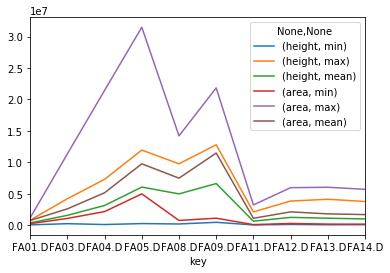

In [35]:
%matplotlib inline

agi.results_tic.groupby(level=0).agg({'height': aggs, 'area': aggs}).plot()